In [1]:
# Linear Regression
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
import os
os.chdir("C://Digital Nest/Logistic Regression")
print (os.getcwd())

C:\Digital Nest\Logistic Regression


In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns.values

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'], dtype=object)

In [4]:
np.unique(iris.Species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
irisX = pd.DataFrame(iris,columns=["PetalLength"])
irisY = pd.DataFrame(iris,columns=["Species"])
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
irisY.Species = LE.fit_transform(irisY.Species)
print(np.unique(irisY.Species,return_counts=True))

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


In [6]:
irisY.Species[irisY.Species == 2] = 1
print(np.unique(irisY.Species,return_counts=True))

(array([0, 1]), array([ 50, 100], dtype=int64))


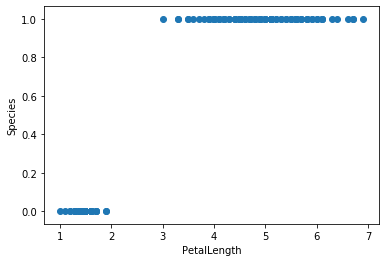

In [7]:
plt.scatter(irisX.PetalLength,irisY.Species)
plt.xlabel("PetalLength")
plt.ylabel("Species")
plt.show()

In [8]:
# calculate error for different values of slope
#species0 = iris.Species[irisY.Species==0]
#species1 = iris.Species[irisY.Species==1]
slopes = np.arange(0.3,0.6,0.01)
error = list()
for m in slopes:
    predictY = m * irisX.PetalLength
    probability = np.exp(predictY) / (1 + np.exp(predictY))
    probability0 = probability[irisY.Species==0]
    probability1 = probability[irisY.Species==1]
    entropy0 = np.log(1-probability0)
    entropy1 = np.log(probability1)
    entropy = -(entropy0.sum() + entropy1.sum())
    error.append(entropy)

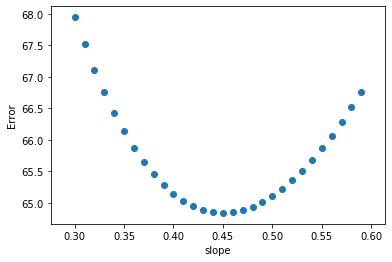

In [9]:
plt.scatter(slopes,error)
plt.xlabel("slope")
plt.ylabel("Error")
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(fit_intercept=False)
LGR.fit(irisX,irisY.Species)
print(LGR.coef_)
print(LGR.intercept_)

[[0.44788695]]
[0.]
